In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

In [2]:
print(f"Using TensorFlow version: {tf.__version__}")
print(f"Using TensorFlow Hub version: {hub.__version__}")
print(f"Using Numpy version: {np.__version__}")
print(f"GPU Device Found." if tf.config.list_physical_devices('GPU') else "GPU Device Not Found. Running on CPU")

Using TensorFlow version: 2.8.0
Using TensorFlow Hub version: 0.12.0
Using Numpy version: 1.22.2
GPU Device Found.


In [3]:
datasetPath = "../Dataset/robot_used/"

In [4]:
def view_data(rows, cols, pic_index, label, datasetType):
    print(f"Label shown is: {label}")
    fig = plt.gcf()
    fig.set_size_inches(rows*4, cols*4)
    
    pic_index += 8
    usedPath = os.path.join(datasetPath, datasetType)
    
    nextImage = [os.path.join(usedPath, f"{label}/{file}")
                        for file in os.listdir(os.path.join(usedPath, label))[pic_index-8:pic_index]
                        ]
    
    print(f"{datasetType} Images:")
    for index, img_path in enumerate(nextImage):
        sp = plt.subplot(rows, cols, index +1)
        sp.axis("off")
        
        img = mpimg.imread(img_path)
        plt.imshow(img)

Label shown is: Egyptian Mau
training Images:


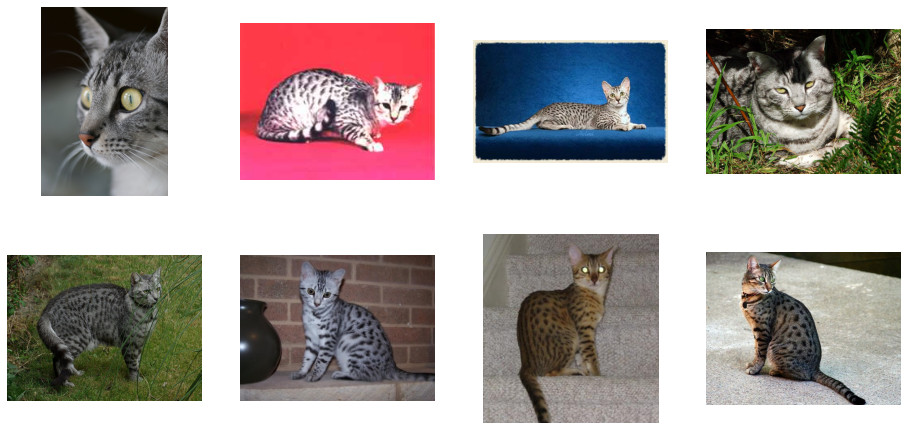

In [55]:
folder = os.listdir(os.path.join(datasetPath, "training"))
row = 4
collumn = 4
image_index = 12
view_data(row, collumn, image_index, folder[5], "training")

In [6]:
tempPath = os.path.join(datasetPath, "training")
datasetClass = os.listdir(tempPath)
datasetImage_count = 0

for label in datasetClass:
    temp = []
    for file in os.listdir(os.path.join(tempPath, label)):
        temp.append(file)
    datasetImage_count += len(temp)

print(f"There are {len(datasetClass)} labels with {datasetImage_count} images")

There are 12 labels with 2387 images


In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    # tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    # tf.keras.layers.MaxPool2D(2, 2),
    # tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    # tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(len(datasetClass), activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [8]:
def imageData_generator(trainPath, testPath):
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        rotation_range = 25,
        horizontal_flip = True,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        brightness_range=[0.1, 0.9]
    )
    
    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_directory(
        trainPath,
        batch_size=20,
        class_mode="categorical",
        target_size=(150, 150)
    )
    
    test_generator = test_datagen.flow_from_directory(
        testPath,
        batch_size=20,
        class_mode="categorical",
        target_size=(150, 150)
    )
    
    return train_generator, test_generator

In [9]:
train_gen, test_gen = imageData_generator(f"{datasetPath}/training", f"{datasetPath}/validation")

Found 2384 images belonging to 12 classes.
Found 1334 images belonging to 12 classes.


In [25]:
model.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [26]:
history = model.fit(
    train_gen,
    validation_data=test_gen,
    steps_per_epoch=20,
    epochs=50,
    verbose=1
    # validation_steps=25
)

Epoch 1/50
20/20 [==============================] - 32s 1s/step - loss: 2.5020 - accuracy: 0.0850 - val_loss: 48.7447 - val_accuracy: 0.0832
Epoch 2/50
20/20 [==============================] - 23s 1s/step - loss: 2.4883 - accuracy: 0.0885 - val_loss: 4.0377 - val_accuracy: 0.0885
Epoch 3/50
20/20 [==============================] - 36s 2s/step - loss: 2.4880 - accuracy: 0.0700 - val_loss: 11.9830 - val_accuracy: 0.0877
Epoch 4/50
20/20 [==============================] - 31s 2s/step - loss: 2.4879 - accuracy: 0.0825 - val_loss: 16.0376 - val_accuracy: 0.0885
Epoch 5/50
20/20 [==============================] - 24s 1s/step - loss: 2.4862 - accuracy: 0.0850 - val_loss: 138.4555 - val_accuracy: 0.0817
Epoch 6/50
20/20 [==============================] - 20s 1s/step - loss: 2.4866 - accuracy: 0.0875 - val_loss: 73.6432 - val_accuracy: 0.0825
Epoch 7/50
20/20 [==============================] - 17s 877ms/step - loss: 2.4877 - accuracy: 0.0850 - val_loss: 24.1408 - val_accuracy: 0.1604
Epoch 8/50

In [15]:
def result_visualization(model_result, type):
    train = model_result.history[type]
    val = model_result.history[f"val_{type}"]
    
    epochs = range(len(train))
    if type == "accuracy":
        plt.plot(epochs, train, 'r', label="Training Accuracy")
        plt.plot(epochs, val, 'b', label="Validation Accuracy")
        plt.title("Training and Validation Accuracy")
    elif type == "loss":
        plt.plot(epochs, train, 'r', label="Training Loss")
        plt.plot(epochs, val, 'b', label="Validation Loss")
        plt.title("Training and Validation Loss")
    plt.legend(loc=0)
    plt.figure()
    plt.show()

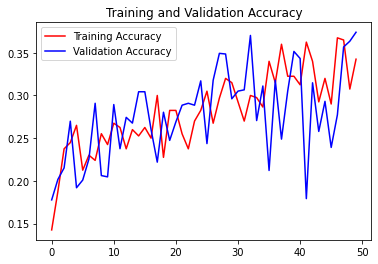

<Figure size 432x288 with 0 Axes>

In [23]:
result_visualization(history, "accuracy") # mengurangi learning rate

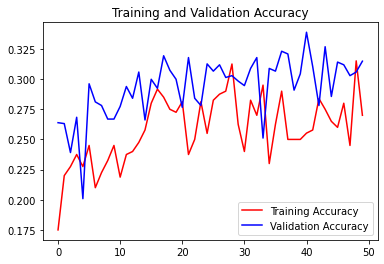

<Figure size 432x288 with 0 Axes>

In [18]:
result_visualization(history, "accuracy") # 50 epoch

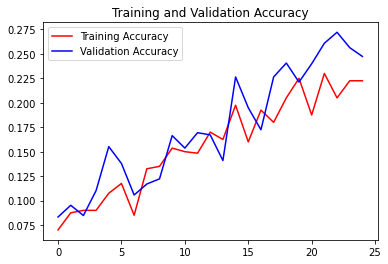

<Figure size 432x288 with 0 Axes>

In [16]:
result_visualization(history, "accuracy") # 25 epoch